<a href="https://colab.research.google.com/github/Heather-bu/bme3053c/blob/main/midterm_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your goal is to recreate a neural network from scratch and train it on the MNIST dataset! You are free to use Cursor to assist you with this assignment.





Part 1:

Follow the steps in the first link below to compute the forward and backward passes of the neural network. Use the 2nd link to assist you with this task (look at the last cell). Use the same weights and inputs and print out the new weights connected to the hidden and output layers. (You should print the exact weight values computed in the first link)

 https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/Links to an external site.

https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-02/lesson-02.solutions.ipynbLinks to an external site.

Part 2:

Create a neural network using Numpy and train it on the MNIST dataset. (Cursor will assist you)

Evaluate the accuracy and F1 scores for each of the 10 digits. Use figures to visualize your results.

#

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize the network with the same weights from the example
def initialize_network():
    network = {
        'h1': {'w1': 0.15, 'w2': 0.20, 'b': 0.35},
        'h2': {'w1': 0.25, 'w2': 0.30, 'b': 0.35},
        'o1': {'w1': 0.40, 'w2': 0.45, 'b': 0.60},
        'o2': {'w1': 0.50, 'w2': 0.55, 'b': 0.60}
    }
    return network

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward_pass(network, inputs):
    # Hidden layer
    h1_input = network['h1']['w1'] * inputs[0] + network['h1']['w2'] * inputs[1] + network['h1']['b']
    h1_output = sigmoid(h1_input)

    h2_input = network['h2']['w1'] * inputs[0] + network['h2']['w2'] * inputs[1] + network['h2']['b']
    h2_output = sigmoid(h2_input)

    # Output layer
    o1_input = network['o1']['w1'] * h1_output + network['o1']['w2'] * h2_output + network['o1']['b']
    o1_output = sigmoid(o1_input)

    o2_input = network['o2']['w1'] * h1_output + network['o2']['w2'] * h2_output + network['o2']['b']
    o2_output = sigmoid(o2_input)

    return (h1_output, h2_output), (o1_output, o2_output)

# Backward pass
def backward_pass(network, inputs, hidden_outputs, final_outputs, targets):
    learning_rate = 0.5
    h1_output, h2_output = hidden_outputs
    o1_output, o2_output = final_outputs

    # Output layer errors
    o1_error = -(targets[0] - o1_output) * sigmoid_derivative(o1_output)
    o2_error = -(targets[1] - o2_output) * sigmoid_derivative(o2_output)

    # Hidden layer errors
    h1_error = (network['o1']['w1'] * o1_error + network['o2']['w1'] * o2_error) * sigmoid_derivative(h1_output)
    h2_error = (network['o1']['w2'] * o1_error + network['o2']['w2'] * o2_error) * sigmoid_derivative(h2_output)

    # Update output layer weights
    network['o1']['w1'] -= learning_rate * o1_error * h1_output
    network['o1']['w2'] -= learning_rate * o1_error * h2_output
    network['o2']['w1'] -= learning_rate * o2_error * h1_output
    network['o2']['w2'] -= learning_rate * o2_error * h2_output

    # Update hidden layer weights
    network['h1']['w1'] -= learning_rate * h1_error * inputs[0]
    network['h1']['w2'] -= learning_rate * h1_error * inputs[1]
    network['h2']['w1'] -= learning_rate * h2_error * inputs[0]
    network['h2']['w2'] -= learning_rate * h2_error * inputs[1]

    return network

# Run the example
network = initialize_network()
inputs = [0.05, 0.10]
targets = [0.01, 0.99]

# Forward pass
hidden_outputs, final_outputs = forward_pass(network, inputs)
print("Initial outputs:", final_outputs)

# Backward pass
network = backward_pass(network, inputs, hidden_outputs, final_outputs, targets)

# Print updated weights
print("\nUpdated weights:")
print("Hidden layer:")
print(f"w1_h1: {network['h1']['w1']:.8f}")
print(f"w2_h1: {network['h1']['w2']:.8f}")
print(f"w1_h2: {network['h2']['w1']:.8f}")
print(f"w2_h2: {network['h2']['w2']:.8f}")
print("\nOutput layer:")
print(f"w1_o1: {network['o1']['w1']:.8f}")
print(f"w2_o1: {network['o1']['w2']:.8f}")
print(f"w1_o2: {network['o2']['w1']:.8f}")
print(f"w2_o2: {network['o2']['w2']:.8f}")

Initial outputs: (0.7513650695523157, 0.7729284653214625)

Updated weights:
Hidden layer:
w1_h1: 0.14978072
w2_h1: 0.19956143
w1_h2: 0.24975114
w2_h2: 0.29950229

Output layer:
w1_o1: 0.35891648
w2_o1: 0.40866619
w1_o2: 0.51130127
w2_o2: 0.56137012


Loading MNIST dataset...
Training the network...
Epoch 1/10, Accuracy: 0.0000
Epoch 2/10, Accuracy: 0.0000
Epoch 3/10, Accuracy: 0.0000
Epoch 4/10, Accuracy: 0.0000
Epoch 5/10, Accuracy: 0.0000
Epoch 6/10, Accuracy: 0.0000
Epoch 7/10, Accuracy: 0.0000
Epoch 8/10, Accuracy: 0.0000
Epoch 9/10, Accuracy: 0.0000
Epoch 10/10, Accuracy: 0.0000


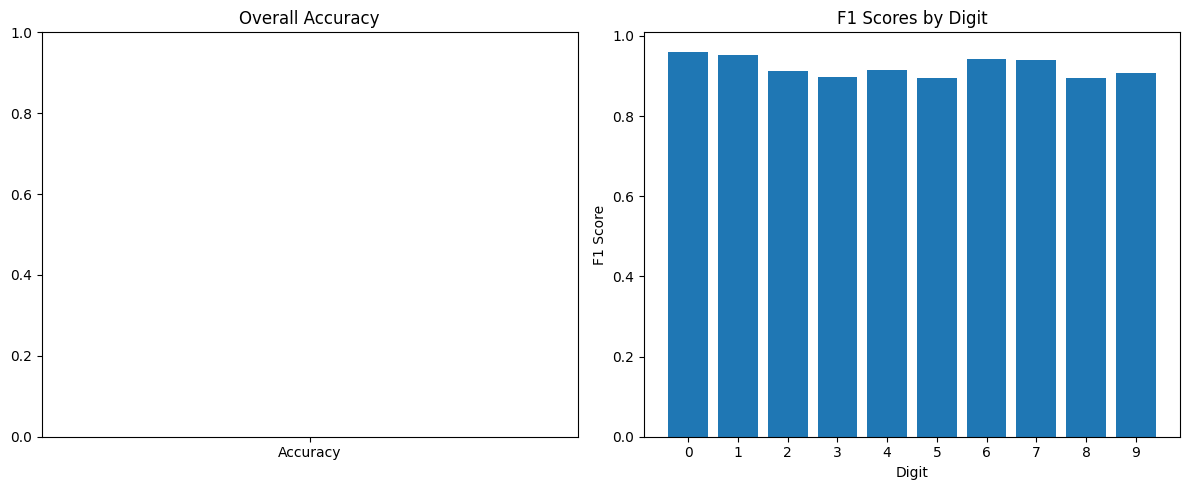


Overall Accuracy: 0.0000

F1 Scores by digit:
Digit 0: 0.9609
Digit 1: 0.9531
Digit 2: 0.9132
Digit 3: 0.8986
Digit 4: 0.9145
Digit 5: 0.8958
Digit 6: 0.9430
Digit 7: 0.9395
Digit 8: 0.8958
Digit 9: 0.9065


In [4]:


# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Convert y to one-hot encoding
        y_one_hot = np.zeros((m, 10))
        y_one_hot[np.arange(m), y.astype(int)] = 1

        # Backward pass
        output_error = self.output - y_one_hot
        hidden_error = np.dot(output_error, self.weights2.T) * self.sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights2 -= learning_rate * np.dot(self.hidden.T, output_error) / m
        self.bias2 -= learning_rate * np.sum(output_error, axis=0, keepdims=True) / m
        self.weights1 -= learning_rate * np.dot(X.T, hidden_error) / m
        self.bias1 -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True) / m

# Initialize and train the network
nn = NeuralNetwork(784, 128, 10)
learning_rate = 0.1
epochs = 10
batch_size = 128

# Training loop
print("Training the network...")
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        # Forward and backward passes
        nn.forward(batch_X)
        nn.backward(batch_X, batch_y, learning_rate)

    # Calculate accuracy for this epoch
    predictions = np.argmax(nn.forward(X_test), axis=1)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# Final evaluation
predictions = np.argmax(nn.forward(X_test), axis=1)
accuracy = accuracy_score(y_test, predictions)
f1_scores = f1_score(y_test.astype(int), predictions, average=None)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.bar(['Accuracy'], [accuracy])
plt.title('Overall Accuracy')
plt.ylim(0, 1)

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.bar(range(10), f1_scores)
plt.title('F1 Scores by Digit')
plt.xlabel('Digit')
plt.ylabel('F1 Score')
plt.xticks(range(10))

plt.tight_layout()
plt.show()

# Print metrics
print(f"\nOverall Accuracy: {accuracy:.4f}")
print("\nF1 Scores by digit:")
for digit, f1 in enumerate(f1_scores):
    print(f"Digit {digit}: {f1:.4f}")